In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [11]:
linestyles = ['-','--',':']

def E(X, g=lambda x:x):
    x_set, f = X
    return np.sum([ g(x_k)*f(x_k) for x_k in x_set])

def V(X, g=lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([ (g(x_k)-mean)**2*f(x_k) for x_k in x_set])

def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0),'minus probability'
    prob_sum = np.round(np.sum(prob),6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'기대값: {E(X):.4}')
    print(f'분  산: {V(X):.4}')
    
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(111)
    ax.bar(x_set, prob, label= 'prob')
    ax.vlines(E(X), 0,1, label = 'mean')
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0,prob.max()*1.2)
    ax.legend()
    plt.show()


In [12]:
def Bern(p):
    x_set = np.array([0,1])
    def f(x):
        if x in x_set:
            return p**x*(1-p)**(1-x)
        else:
            return 0
    return x_set, f

In [13]:
p = 0.3
X = Bern(p)

In [14]:
X

(array([0, 1]), <function __main__.Bern.<locals>.f(x)>)

In [15]:
check_prob(X)

기대값: 0.3
분  산: 0.21


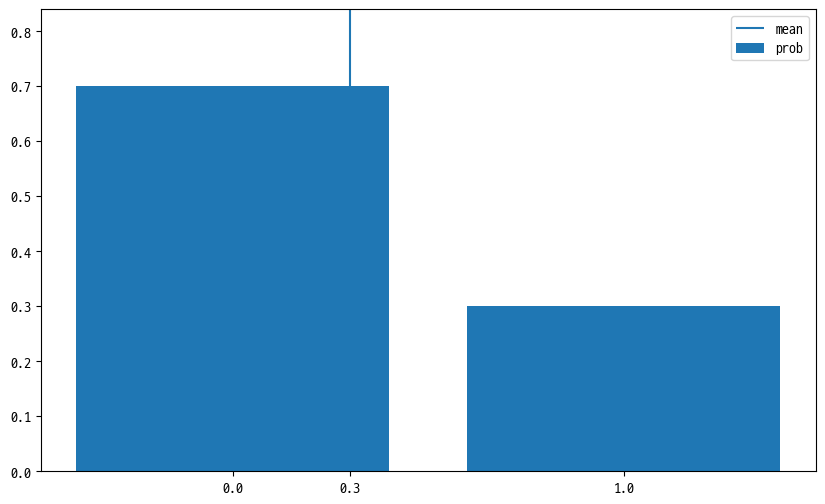

In [16]:
plot_prob(X)

In [17]:
p = 0.3
rv = stats.bernoulli(p)

In [19]:
rv.pmf(0)

0.7

In [21]:
rv.pmf([0,1])

array([0.7, 0.3])

In [22]:
rv.cdf([0,1])

array([0.7, 1. ])

In [23]:
rv.var()

0.21

In [24]:
from scipy.special import comb

In [27]:
def Bin(n,p):
    x_set = np.arange(n+1)
    def f(x):
        if x in x_set:
            return comb(n,x) * p**x * (1-p)**(n-x)
        else:
            return 0
    return x_set,f

In [28]:
n = 10
p = 0.3
X = Bin(n,p)

In [29]:
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

In [30]:
check_prob(X)

기대값: 3.0
분  산: 2.1


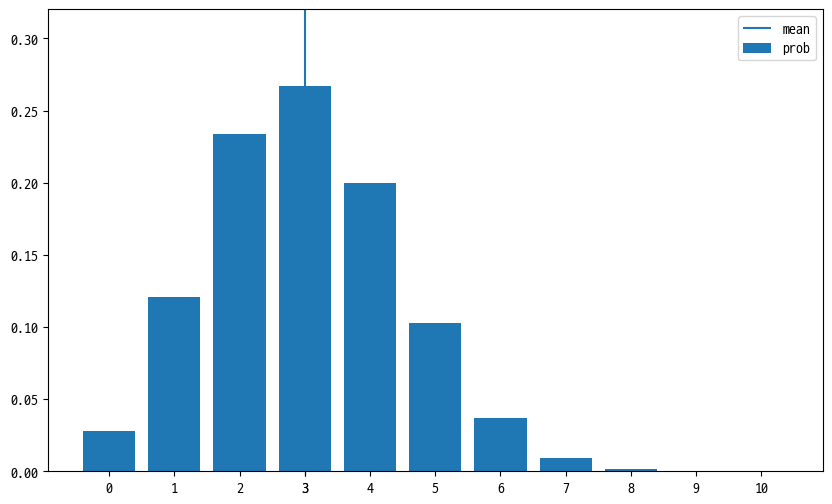

In [31]:
plot_prob(X)